# Multi-Modal data comparison
This notebook analyzes other data and compares this with the eye blinking and neural results.

## Standard Deviation of the Lateral Position (SDLP)

In [41]:
import csv
import numpy as np
import matplotlib.pyplot as plt

sdlp_normal = []
sdlp_sleepy = []
kss3_normal = []
kss3_sleepy = []
labels = []

with open('../multi_modal_data/multi_modal.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        if 'N' in row[0]:
            sdlp_normal.append(float(row[1].replace(',', '.')))
            kss3_normal.append(int(row[2]))
            labels.append(row[0][:-1])
        elif 'S' in row[0]:
            sdlp_sleepy.append(float(row[1].replace(',', '.')))
            kss3_sleepy.append(int(row[2]))
print(sdlp_normal)
print(sdlp_sleepy)
print(labels)
print(kss3_sleepy)

[14.32, 25.62, 13.8, 19.95, 18.66, 15.75, 23.02, 20.51, 12.64]
[18.91, 25.36, 14.2, 20.07, 17.97, 18.8, 22.22, 18.55, 12.8]
['1', '3', '4', '6', '7', '9', '10', '11', '12']
[8, 9, 7, 3, 5, 0, 7, 2, 6]


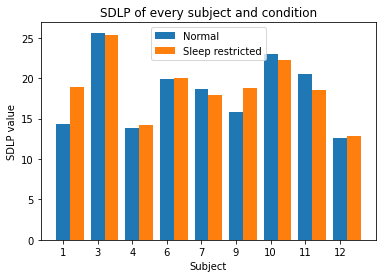

In [29]:
X = np.arange(len(sdlp_normal))

plt.bar(X , sdlp_normal, width = 0.4, label = 'Normal')
plt.bar(X + 0.4, sdlp_sleepy, width = 0.4, label = 'Sleep restricted')
plt.legend()
plt.xticks(X, labels)
plt.xlabel('Subject')
plt.ylabel('SDLP value')
plt.title('SDLP of every subject and condition')

plt.savefig('../figures/sdlp_per_subject.jpg')
plt.show()

### Change in SDLP between conditions
The change of SDLP taken from the sleepy condition. Where a positive value means a higher SDLP in the sleepy condition, and a negative value means a higher SDLP value in the normal condition.

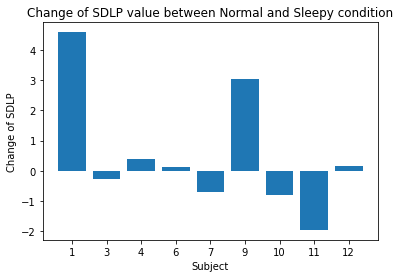

In [34]:
sdlp_change = np.array(sdlp_sleepy) - np.array(sdlp_normal)

plt.bar(X, sdlp_change)
plt.xticks(X, labels)
plt.xlabel('Subject')
plt.ylabel('Change of SDLP')
plt.title('Change of SDLP value between Normal and Sleepy condition')

plt.savefig('../figures/sdlp_change.jpg')
plt.show()

## Karolinska Sleepiness Scale (KSS)
Analyzing and comparing with the KSS scores, appointed during the turning point after half an hour of driving.

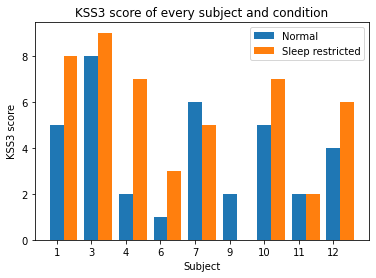

In [42]:
X = np.arange(len(kss3_normal))

plt.bar(X , kss3_normal, width = 0.4, label = 'Normal')
plt.bar(X + 0.4, kss3_sleepy, width = 0.4, label = 'Sleep restricted')
plt.legend()
plt.xticks(X, labels)
plt.xlabel('Subject')
plt.ylabel('KSS3 score')
plt.title('KSS3 score of every subject and condition')

plt.savefig('../figures/kss3_per_subject.jpg')
plt.show()



In [52]:
def analyze_kss(normal_scores, sleepy_scores, labels):
    change = np.array(sleepy_scores) - np.array(normal_scores)
    sleep_effect = np.where(change > 0)[0]
    no_effect = np.where(change <= 0)[0]
    
    effect_subjects = [labels[i] for i in sleep_effect]
    no_effect_subjects = [labels[i] for i in no_effect]
    
    print("Subjects where sleepy condition is more sleepy: ")
    print(effect_subjects)
    print("Subjects where sleepy condition is NOT more sleepy: ")
    print(no_effect_subjects)
    
analyze_kss(kss3_normal, kss3_sleepy, labels)

Subjects where sleepy condition is more sleepy: 
['1', '3', '4', '6', '10', '12']
Subjects where sleepy condition is NOT more sleepy: 
['7', '9', '11']
